### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [135]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [136]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [137]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [139]:
data['New_Price']

0             NaN
1             NaN
2       8.61 Lakh
3             NaN
4             NaN
          ...    
6014    7.88 Lakh
6015          NaN
6016          NaN
6017          NaN
6018          NaN
Name: New_Price, Length: 6019, dtype: object

### "New_Price" 열의 null data가 너무 많아서 drop해버림

In [140]:
data.drop(['New_Price'],axis=1,inplace=True)

### 결측치 제거

In [141]:
data.dropna(axis=0, inplace = True)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage            5975 non-null   object 
 9   Engine             5975 non-null   object 
 10  Power              5975 non-null   object 
 11  Seats              5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 653.5+ KB


In [143]:
data.isnull().sum(axis=0)

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [144]:
# target variable 설정

target = data['Price']

In [145]:
# feature variable에 들어가게끔 설정

data.drop(['Price'],axis=1,inplace=True)
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [146]:
# categorical data 설정
categorical_data = data.drop(columns=['Year','Kilometers_Driven','Seats','Mileage','Engine','Power'])

In [147]:
categorical_data.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second


In [148]:
for col in categorical_data.columns:
    print(col,'unique 갯수',len(categorical_data[col].unique()))

Name unique 갯수 1855
Location unique 갯수 11
Fuel_Type unique 갯수 4
Transmission unique 갯수 2
Owner_Type unique 갯수 4


In [149]:
# name은 유의미하지 않으므로 dummy 갯수가 많아지는 것을 고려하여 삭제

categorical_data.drop('Name',axis=1,inplace=True)

### categorical to dummy variables

In [150]:
# 범주형 데이터 dummy variable로 설정

dummy_categorical_data = pd.get_dummies(categorical_data)

### numeric data: year, kilometers_driven, seats, mileage, engine, power

In [151]:
x_data = data.drop(columns=categorical_data.columns)
x_data.drop('Name',axis=1,inplace=True)

In [152]:
import re

#기호 전처리

x_data['Mileage'] = x_data['Mileage'].apply(lambda x: re.sub('[^0-9]','',x))
x_data['Engine'] = x_data['Engine'].apply(lambda x: re.sub('[^0-9]','',x))
x_data['Power'] = x_data['Power'].apply(lambda x: re.sub('[^0-9]','',x))

In [153]:
x_data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,2010,72000,266,998,5816,5.0
1,2015,41000,1967,1582,1262,5.0
2,2011,46000,182,1199,887,5.0
3,2012,87000,2077,1248,8876,7.0
4,2013,40670,152,1968,1408,5.0
...,...,...,...,...,...,...
6014,2014,27365,284,1248,74,5.0
6015,2015,100000,244,1120,71,5.0
6016,2012,55000,140,2498,112,8.0
6017,2013,46000,189,998,671,5.0


In [154]:
concat_data = pd.concat([dummy_categorical_data,x_data],axis=1)

In [155]:
# 숫자 데이터로 변환
concat_data = concat_data.apply(pd.to_numeric)

### data distribution

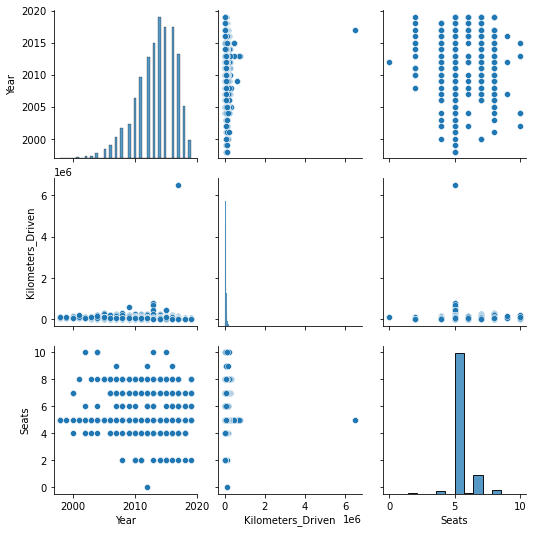

In [81]:
# numeric data 선현성 확인

sns.pairplot(x_data)

### correlation matrix 

<AxesSubplot:>

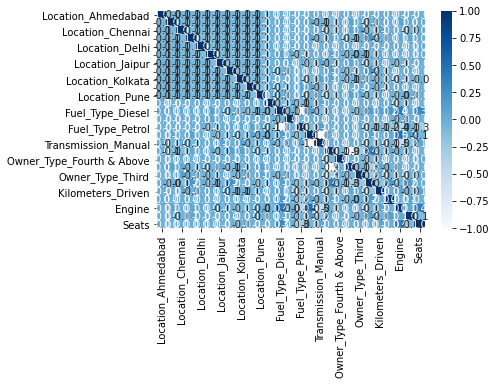

In [29]:
sns.heatmap(data = concat_data.corr(),annot=True, fmt = '.1f', cmap='Blues')

### target data distribution

<AxesSubplot:xlabel='Price', ylabel='Density'>

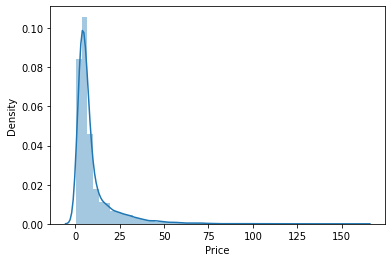

In [82]:
sns.distplot(target)

<AxesSubplot:xlabel='Price', ylabel='Density'>

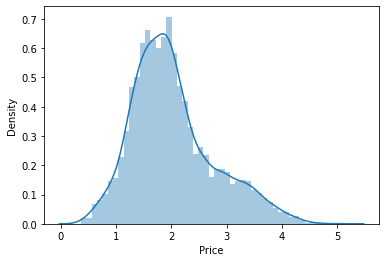

In [156]:
# target variable 분포 skewness가 너무 심해서 log변환 필요
log_target = np.log1p(target)
sns.distplot(log_target)

In [157]:
tmp_df = pd.concat([concat_data,log_target],axis=1)
tmp_df.dropna(axis=0,inplace=True)

### LinearRegression

In [158]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(tmp_df.drop('Price',axis=1), tmp_df['Price'], test_size=0.33, random_state=123)

In [159]:
linear_regression = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
linear_regression.fit(x_train,y_train)

LinearRegression(normalize=True)

In [160]:
linear_regression.score(x_test,y_test)

0.8447667479515073

In [161]:
print(linear_regression.intercept_)
print(linear_regression.coef_)

-1383717056674.2307
[ 1.47916896e+12  1.47916896e+12  1.47916896e+12  1.47916896e+12
  1.47916896e+12  1.47916896e+12  1.47916896e+12  1.47916896e+12
  1.47916896e+12  1.47916896e+12  1.47916896e+12  2.71819597e+11
  2.71819597e+11  2.71819597e+11  2.71819597e+11  4.42796003e+11
  4.42796003e+11 -8.10067505e+11 -8.10067505e+11 -8.10067505e+11
 -8.10067505e+11  1.00196451e-01 -6.49038961e-08  2.55936261e-05
  6.99537471e-04  5.59974935e-06 -7.40022127e-02]


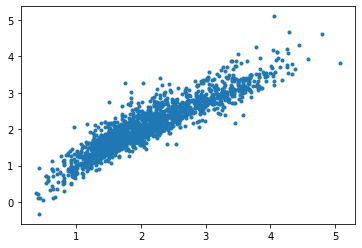

In [162]:
plt.plot(y_test, linear_regression.predict(X_test),'.')

In [164]:
rmse_linear_accuracy = mean_squared_error(y_test,linear_regression.predict(x_test))**0.5
rmse_linear_accuracy

0.2957827477793703

### XGBoost regression

#### tree기반 모델이기 때문에, 단순 regression과 다르게 scaler등 따로 전처리가 필요가 없다. 
#### categorical variable도 dummy variable로 단순 처리

#### XGBoost 모델링 -> BayesianOptimization을 통해 hyperparameter tuning -> optimal hyperparameter를 통해서 XGBoost training -> feature importance확인

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score
import time
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV
from bayes_opt import BayesianOptimization
%matplotlib inline

In [168]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'test')]

In [169]:
def xgb_evaluate(max_depth, eta, gamma, colsample_bytree, subsample, min_child_weight,lamb):
    params = {'eval_metric': 'rmse',
              'objective': 'reg:linear',
              'max_depth': int(round(max_depth)),
              'subsample': subsample, 
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'min_child_weight' : min_child_weight,
              'gpu_id' : 0, 
              'tree_method' : 'gpu_hist',
              'lambda': lamb,
              'grow_policy': 'lossguide'}
    cv_result = xgb.cv(params, xgb.DMatrix(concat_data, label = target) ,num_boost_round = 10000, nfold = 5, early_stopping_rounds=100)
    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [34]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3,10),
                                             'eta': (0.02,0.2),
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.5, 1),
                                             'subsample': (0.5, 1),
                                             'min_child_weight': (0,5),
                                             'lamb': (0,1)})
xgb_bo.maximize(init_points=10, n_iter = 10)

|   iter    |  target   | colsam... |    eta    |   gamma   |   lamb    | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------------------
[16:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[16:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
|  8        | -3.56     |  0.7253   |  0.1058   |  0.1619   |  0.2129   |  6.919    |  4.306    |  0.5609   |
[16:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:1

|  16       | -3.505    |  1.0      |  0.02     |  0.06984  |  1.0      |  3.772    |  2.497    |  0.5      |
[16:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
|  17

In [35]:
params = xgb_bo.max['params']

In [36]:
params['max_depth'] = int(params['max_depth'])

In [122]:
params

{'colsample_bytree': 0.7601939609376154,
 'eta': 0.06980794207533704,
 'gamma': 0.8860937892503885,
 'lamb': 0.7732502882787768,
 'max_depth': 3,
 'min_child_weight': 1.79540694768415,
 'subsample': 0.6873511523388128}

In [165]:
params = {'colsample_bytree': 0.7601939609376154,
 'eta': 0.06980794207533704,
 'gamma': 0.8860937892503885,
 'lamb': 0.7732502882787768,
 'max_depth': 3,
 'min_child_weight': 1.79540694768415,
 'subsample': 0.6873511523388128}

params['max_depth'] = int(params['max_depth'])

In [170]:
clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)

[23:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "lamb" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:1.57929	test-rmse:1.62495
[10]	train-rmse:0.83269	test-rmse:0.85949
[20]	train-rmse:0.48721	test-rmse:0.50485
[30]	train-rmse:0.33577	test-rmse:0.34812
[40]	train-rmse:0.27816	test-rmse:0.28970
[50]	train-rmse:0.25310	test-rmse:0.26448
[60]	train-rmse:0.24148	test-rmse:0.25343
[70]	train-rmse:0.23482	test-rmse:0.24735
[80]	train-rmse:0.22998	test-rmse:0.24255
[90]	train-rmse:0.22687	test-rmse:0.23991
[100]	train-rmse:0.22396	test-rmse:0.23757
[110]	train-rmse:0.22257	test-rmse:0.23649
[120]	train-rmse:0.22053	test-rmse:0.23508
[130]	train-rmse:0.21909	test-rmse:0.23383
[140]	train-rmse:0.21764	

[1800]	train-rmse:0.19268	test-rmse:0.21318
[1810]	train-rmse:0.19236	test-rmse:0.21271
[1820]	train-rmse:0.19236	test-rmse:0.21271
[1830]	train-rmse:0.19204	test-rmse:0.21250
[1840]	train-rmse:0.19204	test-rmse:0.21250
[1850]	train-rmse:0.19204	test-rmse:0.21249
[1860]	train-rmse:0.19188	test-rmse:0.21233
[1870]	train-rmse:0.19173	test-rmse:0.21219
[1880]	train-rmse:0.19173	test-rmse:0.21219
[1890]	train-rmse:0.19173	test-rmse:0.21219
[1900]	train-rmse:0.19173	test-rmse:0.21220
[1910]	train-rmse:0.19173	test-rmse:0.21220
[1920]	train-rmse:0.19173	test-rmse:0.21219
[1930]	train-rmse:0.19173	test-rmse:0.21220
[1940]	train-rmse:0.19173	test-rmse:0.21220
[1950]	train-rmse:0.19173	test-rmse:0.21220
[1960]	train-rmse:0.19173	test-rmse:0.21221
[1968]	train-rmse:0.19173	test-rmse:0.21220


#### xgboost로 feature importance를 보았을 때, Engine, Kilometers_Driven, Year, Power, Mileage가 가장 중요하게 나왔다


In [171]:
clf.get_fscore()

{'Engine': 284,
 'Kilometers_Driven': 66,
 'Transmission_Automatic': 41,
 'Year': 155,
 'Seats': 27,
 'Fuel_Type_Petrol': 3,
 'Transmission_Manual': 12,
 'Fuel_Type_Diesel': 11,
 'Power': 196,
 'Location_Coimbatore': 20,
 'Owner_Type_First': 10,
 'Mileage': 91,
 'Location_Kolkata': 23,
 'Location_Hyderabad': 25,
 'Location_Bangalore': 16,
 'Location_Kochi': 2,
 'Location_Delhi': 4,
 'Location_Mumbai': 2,
 'Location_Pune': 1,
 'Location_Ahmedabad': 1}

In [172]:
xg_pred = clf.predict(d_test)

In [173]:
from sklearn.metrics import mean_squared_error

xgb_accuracy = mean_squared_error(y_test,xg_pred)
print(xgb_accuracy)

0.04502867387632311


### 결론: rmse와 scoring을 비교해보았을 때, 복잡한 모형인 boosting 계열의 xgboost이  단순 선형회귀분석 보다 성능이 나음